In [1]:
#This dataset has news articles grouped into 20 news categories
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', shuffle = True)
newsgroups_test = fetch_20newsgroups(subset='test', shuffle = True)

In [2]:
print(list(newsgroups_train.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [3]:
#Sample news
newsgroups_train.data[:2]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [4]:
print(newsgroups_train.filenames.shape, newsgroups_train.target.shape)

(11314,) (11314,)


In [0]:
#Data Preprocessing, through the following steps:
#Tokenization.
#Words that have fewer than 3 characters are removed.
#All stopwords are removed.
#Lemmatization.
#Stemming.

'''
Loading Gensim and nltk libraries
'''
#pip install gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)

In [6]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [7]:
print(WordNetLemmatizer().lemmatize('went', pos = 'v')) #Lemmatizer example

go


In [8]:
import pandas as pd
stemmer = SnowballStemmer("english")
original_words = ['agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted'] #Stemming example
singles = [stemmer.stem(plural) for plural in original_words]

pd.DataFrame(data={'original word':original_words, 'stemmed':singles })

,original word,stemmed
0,agreed,agre
1,owned,own
2,humbled,humbl
3,sized,size
4,meeting,meet
5,stating,state
6,siezing,siez
7,itemization,item
8,sensational,sensat
9,traditional,tradit


In [0]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

#Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [0]:
processed_docs = []

for doc in newsgroups_train.data:
    processed_docs.append(preprocess(doc))

In [0]:
'''
Create a dictionary from 'processed_docs' containing the number of times a word appears 
in the training set using gensim.corpora.Dictionary
'''
dictionary = gensim.corpora.Dictionary(processed_docs)

In [0]:
'''
Remove very rare and very common words:
- words appearing less than 15 times
- words appearing in more than 10% of all documents
'''
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [0]:
'''
Create the Bag-of-words model for each document
'''
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [14]:
'''
Preview BOW
'''
document_num = 20
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 18 ("rest") appears 1 time.
Word 166 ("clear") appears 1 time.
Word 336 ("refer") appears 1 time.
Word 350 ("true") appears 1 time.
Word 391 ("technolog") appears 1 time.
Word 437 ("christian") appears 1 time.
Word 453 ("exampl") appears 1 time.
Word 476 ("jew") appears 1 time.
Word 480 ("lead") appears 1 time.
Word 482 ("littl") appears 3 time.
Word 520 ("wors") appears 2 time.
Word 721 ("keith") appears 3 time.
Word 732 ("punish") appears 1 time.
Word 803 ("california") appears 1 time.
Word 859 ("institut") appears 1 time.
Word 917 ("similar") appears 1 time.
Word 990 ("allan") appears 1 time.
Word 991 ("anti") appears 1 time.
Word 992 ("arriv") appears 1 time.
Word 993 ("austria") appears 1 time.
Word 994 ("caltech") appears 2 time.
Word 995 ("distinguish") appears 1 time.
Word 996 ("german") appears 1 time.
Word 997 ("germani") appears 3 time.
Word 998 ("hitler") appears 1 time.
Word 999 ("livesey") appears 2 time.
Word 1000 ("motto") appears 2 time.
Word 1001 ("order") appear

In [0]:
#LDA multicore 
'''
Training lda model using gensim.models.LdaMulticore 
'''
#TODO
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

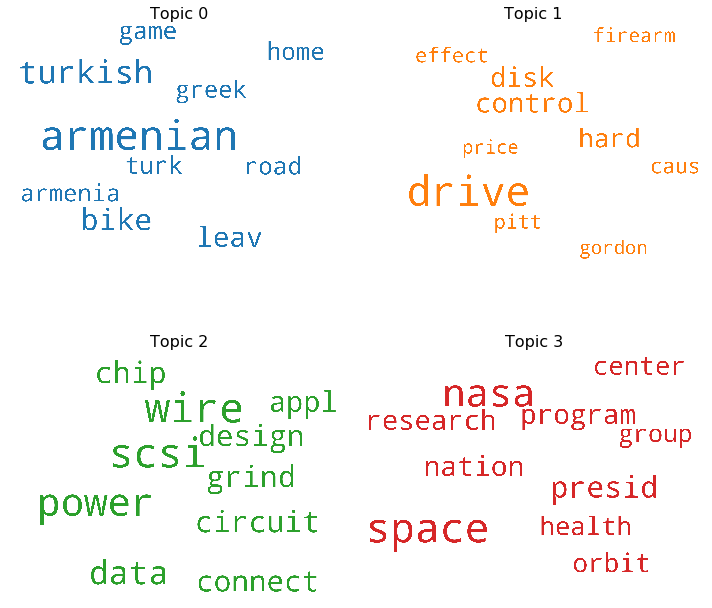

In [24]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [25]:
'''
Words and relative weight in each topic
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.012*"armenian" + 0.006*"turkish" + 0.006*"bike" + 0.005*"leav" + 0.004*"game" + 0.004*"home" + 0.004*"road" + 0.004*"turk" + 0.003*"greek" + 0.003*"armenia"


Topic: 1 
Words: 0.021*"drive" + 0.007*"control" + 0.007*"disk" + 0.006*"hard" + 0.004*"caus" + 0.004*"effect" + 0.004*"pitt" + 0.004*"firearm" + 0.003*"gordon" + 0.003*"price"


Topic: 2 
Words: 0.008*"wire" + 0.008*"scsi" + 0.007*"power" + 0.005*"data" + 0.004*"chip" + 0.004*"circuit" + 0.004*"grind" + 0.004*"design" + 0.004*"connect" + 0.004*"appl"


Topic: 3 
Words: 0.012*"space" + 0.010*"nasa" + 0.006*"presid" + 0.005*"nation" + 0.005*"program" + 0.005*"research" + 0.004*"orbit" + 0.004*"center" + 0.004*"health" + 0.004*"group"


Topic: 4 
Words: 0.010*"govern" + 0.009*"encrypt" + 0.007*"secur" + 0.007*"israel" + 0.006*"chip" + 0.006*"public" + 0.006*"clipper" + 0.006*"isra" + 0.004*"protect" + 0.004*"key"


Topic: 5 
Words: 0.018*"game" + 0.015*"team" + 0.012*"play" + 0.010*"player" + 0.009*"hockey" + 0.0

In [26]:
num = 100
unseen_document = newsgroups_test.data[num]
print(unseen_document)

Subject: help
From: C..Doelle@p26.f3333.n106.z1.fidonet.org (C. Doelle)
Lines: 13

Hello All!

    It is my understanding that all True-Type fonts in Windows are loaded in
prior to starting Windows - this makes getting into Windows quite slow if you
have hundreds of them as I do.  First off, am I correct in this thinking -
secondly, if that is the case - can you get Windows to ignore them on boot and
maybe make something like a PIF file to load them only when you enter the
applications that need fonts?  Any ideas?


Chris

 * Origin: chris.doelle.@f3333.n106.z1.fidonet.org (1:106/3333.26)



In [27]:
#Data preprocessing step for the unseen document
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.9717327952384949	 Topic: 0.016*"window" + 0.014*"file" + 0.010*"program" + 0.007*"card" + 0.007*"version"


In [28]:
print(newsgroups_test.target[num])

2
